# PhosphoELM Data Formatting

This file takes data regarding kinase-protein interactions from the PhosphoELM database and converts the data into the .gmt format. The data was retrieved from the PhosphoELM database on Wed, Jun 7 2017 16:27:31. This data will be added to enhance the KEA2 database and will be suitably formatted for use by ENRICHR and X2K. The citation for the data used in this script is "Phospho.ELM: a database of phosphorylation sites--update 2008. Diella, F., Gould, C.M., Chica, C., Via, A. & Gibson, T.J. Nucleic Acids Res. 2008 Jan;36(Database issue):D240-4." and can also be found on the corresponding gh.pages website.

## Import packages necessary for following program

In [35]:
%run /home/maayanlab/Desktop/Projects/KEA3/Scripts/init.ipy

## Create a dataframe from a file containing PhosphoELM data

In [36]:
#read data into dataframe 'phospho_df'
phospho_df = pd.read_table('~/Desktop/Projects/KEA3/phosphoELM_all_2015-04.txt')

#View dataframe
phospho_df.head()

,acc,sequence,position,code,pmids,kinases,source,species,entry_date
0,O08539,MAEMGSKGVTAGKIASNVQKKLTRAQEKVLQKLGKADETKDEQFEQ...,304,S,17114649,NaN,HTP,Mus musculus,2005-03-14 12:16:11.108314+01
1,O08539,MAEMGSKGVTAGKIASNVQKKLTRAQEKVLQKLGKADETKDEQFEQ...,304,S,17242355,NaN,HTP,Mus musculus,2005-03-14 12:16:11.108314+01
2,O08539,MAEMGSKGVTAGKIASNVQKKLTRAQEKVLQKLGKADETKDEQFEQ...,304,S,15345747,NaN,HTP,Mus musculus,2005-03-14 12:16:11.108314+01
3,O08539,MAEMGSKGVTAGKIASNVQKKLTRAQEKVLQKLGKADETKDEQFEQ...,296,S,17114649,NaN,HTP,Mus musculus,2007-07-13 15:17:45.666219+02
4,O08539,MAEMGSKGVTAGKIASNVQKKLTRAQEKVLQKLGKADETKDEQFEQ...,296,S,17242355,NaN,HTP,Mus musculus,2007-07-13 15:17:45.666219+02


## Filter by Organism and Kinase/Substrate columns
Filters out only columns necessary for .gmt file format (kinases and accession numbers) and esnures that only data from mice and humans are included.

In [37]:
#Define a list of selected organisms
organisms = ['Mus musculus', 'Homo sapiens']

#Get indices of rows whose species is in the selected organisms
indices = [index for index, rowData in phospho_df.iterrows() if rowData['species'] in organisms]

#Filter
phospho_df_filter = phospho_df.loc[indices, ['acc', 'kinases', 'species', 'pmids']].dropna()

#Drop duplicates
phospho_df_filter.drop_duplicates(['acc', 'kinases', 'species'], inplace = True)

#View dataframe
phospho_df_filter.head()

,acc,kinases,species,pmids
9,O08605,PAK2,Mus musculus,15234964
14,O14543,Lck,Homo sapiens,12783885
18,O14746,PKB_group,Homo sapiens,10224060
21,O14746,SRC,Homo sapiens,12808100
27,O14920,IKK_group,Homo sapiens,10195894


## Convert UniProt IDs to Gene Symbols

In [38]:
#Use uniprot_to_symbol function from Scripts.py to convert
phospho_df_filter['target_symbol'] = Scripts.uniprot_to_symbol(phospho_df_filter['acc'].tolist())

#View dataframe
phospho_df_filter.head()

,acc,kinases,species,pmids,target_symbol
9,O08605,PAK2,Mus musculus,15234964,Mknk1
14,O14543,Lck,Homo sapiens,12783885,SOCS3
18,O14746,PKB_group,Homo sapiens,10224060,TERT
21,O14746,SRC,Homo sapiens,12808100,TERT
27,O14920,IKK_group,Homo sapiens,10195894,IKBKB


## Create a new column combining kinases and organism

In [39]:
# Combine 'kinases' and 'species' into one column 'kinase_organism'
phospho_df_filter['kinase_organism'] = ['_'.join([kinase, species]) for kinase, species in phospho_df_filter[['kinases', 'species']].as_matrix()]

#View dataframe
phospho_df_filter.head()

,acc,kinases,species,pmids,target_symbol,kinase_organism
9,O08605,PAK2,Mus musculus,15234964,Mknk1,PAK2_Mus musculus
14,O14543,Lck,Homo sapiens,12783885,SOCS3,Lck_Homo sapiens
18,O14746,PKB_group,Homo sapiens,10224060,TERT,PKB_group_Homo sapiens
21,O14746,SRC,Homo sapiens,12808100,TERT,SRC_Homo sapiens
27,O14920,IKK_group,Homo sapiens,10195894,IKBKB,IKK_group_Homo sapiens


## Perform preliminary data processing 

Select columns necessary for .gmt format and filter into new dataframe 'df'
df = phospho_df[['acc', 'kinases', 'species']]We must drop duplicates and NaNs, as well as select only the columns necessary for the .gmt file format (the protein ids and kinase gene symbols). The species column is also selected for future filtering of data by desired species.

In [40]:
#select columns necessary for .gmt and .sig format and filter into new dataframe 'df'
df_sig = phospho_df_filter[['target_symbol', 'kinase_organism', 'pmids']]

#drop duplicate rows in the dataframe
df_sig.drop_duplicates(inplace = True)

#drop all rows with an 'NaN' value for the kinases
df_sig.dropna(axis = 0, inplace = True)

df = df_sig.drop('pmids', axis = 1)

#Visualize data
df.head()

/home/maayanlab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/maayanlab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,target_symbol,kinase_organism
9,Mknk1,PAK2_Mus musculus
14,SOCS3,Lck_Homo sapiens
18,TERT,PKB_group_Homo sapiens
21,TERT,SRC_Homo sapiens
27,IKBKB,IKK_group_Homo sapiens


## Set Index to 'Kinase_Organism' and Aggregate Kinase Targets

In [41]:
df.set_index('kinase_organism')

#Group kinases in dataframe 'kin'
#Aggregate data in 'kin' according to kinase groups
kin = df.groupby('kinase_organism').agg(lambda x: tuple(x))

#Create a new column with 'PhosphoELM' as description of data
kin.insert(0, 'Description', 'PhosphoELM')

#Visualize Data
kin.head()

,Description,target_symbol
kinase_organism,,
AAK1_Homo sapiens,PhosphoELM,"(NUMB, AP1M1, AP2M1)"
ALK_Homo sapiens,PhosphoELM,"(STAT3, ALK, ZC3HC1)"
AMPK_group_Homo sapiens,PhosphoELM,"(IRS1, KPNA2, EP300, EEF2K, PFKFB2, HNF4A, PRK..."
AMPK_group_Mus musculus,PhosphoELM,"(Irs1, Mtor)"
ATM_Homo sapiens,PhosphoELM,"(CHEK2, ABL1, TP53, ATF2, RPA2, CREB1, BRCA1, ..."


# Exploratory Data Analysis

## Calculate Number of Protein targets for each kinase
Create a new column with the number of substrates related to each kinase, and sort the dataframe by this column.

In [42]:
# Create column representing counts of protein targets per kinase
kin['kinase_targets_num'] = [len(lst) for kinase, lst in kin['target_symbol'].iteritems()]

# Sort kinases from max to min according to number of protein targets each has
kin.sort_values(by = ['kinase_targets_num'], ascending= False, inplace=True)

# Visualize data
kin.head()

,Description,target_symbol,kinase_targets_num
kinase_organism,,,
PKA_group_Homo sapiens,PhosphoELM,"(HIST1H2BI, FGA, ESR1, RAF1, ANXA1, TH, ADRB2,...",139
CK2_group_Homo sapiens,PhosphoELM,"(C1R, JUN, SSB, PGR, CDK1, HSP90AA1, HNRNPC, S...",84
PKC_group_Homo sapiens,PhosphoELM,"(EGFR, IL2RA, LMNA, FGA, TFRC, RAF1, ANXA1, EE...",81
CDK1_Homo sapiens,PhosphoELM,"(BIRC5, EGFR, TK1, KRT8, NPM1, PPP1CA, VIM, TO...",67
PKC_alpha_Homo sapiens,PhosphoELM,"(EGFR, TFRC, ANXA1, INSR, ANXA2, PLEK, SRF, CF...",67


## Create Histogram to display distribution of number of targets per kinase

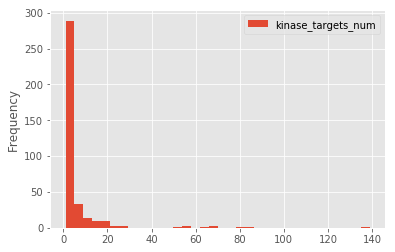

In [43]:
# Create histogram displaying the distribution of the number
#targets per kinase
kin.plot.hist(by = 'kinase_targets_num', bins = 34)

#Show histogram
plt.show()

## Filter Dataframe by Number of Substrates for each Kinase

In [44]:
df_sig.dropna(inplace = True)

df_sig.head()

/home/maayanlab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,target_symbol,kinase_organism,pmids
9,Mknk1,PAK2_Mus musculus,15234964
14,SOCS3,Lck_Homo sapiens,12783885
18,TERT,PKB_group_Homo sapiens,10224060
21,TERT,SRC_Homo sapiens,12808100
27,IKBKB,IKK_group_Homo sapiens,10195894


In [45]:
#Create list of indexes(kinase names) for kinases with fewer than five substrates
sig_key = [index for index, rowData in kin.kinase_targets_num.iteritems() if rowData < 5 ]

#Set indices for dataframe 'kin' of kinases with five or more substrates
indices = [index for index in kin.index if index not in sig_key]

#Create dataframe of all kinases
sig = df_sig.set_index('kinase_organism')

#Reset index of new dataframe
sig.reset_index(inplace = True)

#Rename columns of this dataframe to match .sig format
colnames = ['Source', 'Substrate', 'PubMed_ID']
sig.columns = colnames

## Create File of 'sig' for Later Data Aggregation

In [46]:
#Create dictionary with index numbers as keys
d = dict([(key, '') for key in sig.index])

# loop through rows with iterrows()
for index, rowData in sig.iterrows():
    line = ('\t'.join(rowData))
    d[index] = line
    
#Transfer tab-separated info into a new txt file
with open('Uncondensed_PhosphoELM.txt', 'w') as openfile:
    for index in d:
        openfile.write(str(d[index]) + '\n')

In [47]:
#Insert first four columns for .sig file format (NaNs)
sig.insert(1, 'NA-1', str(np.nan))
sig.insert(2, 'NA-2', str(np.nan))
sig.insert(3, 'NA-3', str(np.nan))
sig.insert(4, 'NA-4', str(np.nan))

#Insert column corresponding to sign (with '?' because it is unknown)
sig.insert(6, 'Sign', '?')

#Insert column specifying interaction type as phosphorylation
sig.insert(7, 'Interaction', 'Phosphorylation')

#View dataframe
sig.head()

,Source,NA-1,NA-2,NA-3,NA-4,Substrate,Sign,Interaction,PubMed_ID
0,PAK2_Mus musculus,nan,nan,nan,nan,Mknk1,?,Phosphorylation,15234964
1,Lck_Homo sapiens,nan,nan,nan,nan,SOCS3,?,Phosphorylation,12783885
2,PKB_group_Homo sapiens,nan,nan,nan,nan,TERT,?,Phosphorylation,10224060
3,SRC_Homo sapiens,nan,nan,nan,nan,TERT,?,Phosphorylation,12808100
4,IKK_group_Homo sapiens,nan,nan,nan,nan,IKBKB,?,Phosphorylation,10195894


In [48]:
#Remove kinases with fewer than five substrates in 'kin'
kin = kin.loc[indices]

## Create .Sig File

In [49]:
#Create dictionary 'sigd' with index numbers as keys
sigd = dict([(key, '') for key in sig.index])

# loop through rows with iterrows()
for index, rowData in sig.iterrows():
    line = ('\t'.join(rowData))
    sigd[index] = line
    
#Transfer tab-separated info into a new txt file
#Make sure to include in ReadMe corresponding column names
with open('PhosphoELMsig.txt', 'w') as openfile:
    for index in sigd:
        openfile.write(str(sigd[index]) + '\n')

#  Creation of Final .GMT File

## Create Dictionary of Tab-Separated Rows of the Dataframe

In [50]:
#Reset index of the dataframe
kin.reset_index(inplace = True)

#create column 'target_symbol_merged' in which all 'target_symbol' elements are joined by a \t symbol
kin['target_symbol_merged'] = ['\t'.join(x) for x in kin['target_symbol']]

#drop the now-unneccesary column 'target_symbol' and 'kinase_targets_num'
kin.drop('target_symbol', axis=1, inplace = True)
kin.drop('kinase_targets_num', axis=1, inplace = True)

#Create dictionary 'PhosphoELM' with index numbers as keys
PhosphoELM_num = dict([(key, '') for key in kin.index])

# loop through rows with iterrows()
for index, rowData in kin.iterrows():
    line = ('\t'.join(rowData))
    PhosphoELM_num[index] = line

## Write Info from Dictionary into a .GMT file

In [51]:
#Transfer tab-separated info into a new txt file
with open('PhosphoELM.gmt', 'w') as openfile:
    for index in PhosphoELM_num:
        openfile.write(str(PhosphoELM_num[index]) + '\n')